In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

import os

In [2]:
import pynrc
from pynrc import nrc_utils
from pynrc.nrc_utils import S, source_spectrum

pynrc.setup_logging('WARNING', verbose=False)

In [3]:
# Observation Definitions
from pynrc.nb_funcs import make_key, obs_wfe, obs_optimize
from pynrc.nb_funcs import model_info, disk_rim_model

# Functions to run a series of operations
from pynrc.nb_funcs import do_opt, do_contrast, do_gen_hdus, do_sat_levels

# Plotting routines
from pynrc.nb_funcs import plot_contrasts, plot_contrasts_mjup, planet_mags, plot_planet_patches
from pynrc.nb_funcs import update_yscale, do_plot_contrasts, do_plot_contrasts2
from pynrc.nb_funcs import plot_hdulist, plot_images, plot_images_swlw

In [4]:
# Various Bandpasses
bp_v = S.ObsBandpass('v')
bp_k = pynrc.bp_2mass('k')
bp_w1 = pynrc.bp_wise('w1')
bp_w2 = pynrc.bp_wise('w2')

In [43]:
sp = pynrc.stellar_spectrum('G2V', 7, 'vegamag', bp_k)

In [44]:
obs = pynrc.obs_hci(sp, 100, None, filter='F410M', xpix=160, ypix=160,
                    wfe_ref_drift=0, wfe_roll_drift=0, autogen_coeffs=False)

In [45]:
obs.gen_psf_coeff()

In [50]:
obs.update_detectors(read_mode='RAPID', ngroup=10, nint=600, verbose=True)
obs.update_detectors_ref(read_mode='RAPID', ngroup=10, nint=600)

New Ramp Settings
  read_mode  :    RAPID
  nf         :        1
  nd2        :        0
  ngroup     :       10
  nint       :      600
New Detector Settings
  wind_mode  :   WINDOW
  xpix       :      160
  ypix       :      160
  x0         :        0
  y0         :        0
New Ramp Times
  t_group    :    0.279
  t_frame    :    0.279
  t_int      :    2.786
  t_int_tot1 :    3.070
  t_int_tot2 :    3.070
  t_exp      : 1671.840
  t_acq      : 1842.120


In [51]:
wfe_dict = [0]
filt_keys = ['F410M']
obs_dict = {filt_keys[0]: obs}

cont_dict = do_contrast(obs_dict, wfe_dict, filt_keys, nsig=5, opt_diff=False)

Observations:   0%|          | 0/1 [00:00<?, ?it/s]

WFE Drift:   0%|          | 0/1 [00:00<?, ?it/s]

(<Figure size 1400x450 with 6 Axes>,
 ([<Axes: title={'center': 'Flux Sensitivities'}, xlabel='Separation (arcsec)', ylabel='2-$\\sigma$ Sensitivities (mag)'>,
   <Axes: ylabel='2-$\\sigma$ Contrast'>,
   <Axes: xlabel='Separation (AU)'>],
  [<Axes: title={'center': 'Mass Sensitivities -- BEX Models'}, xlabel='Separation (arcsec)', ylabel='Mass Limits ($M_{\\mathrm{Jup}}$)'>,
   <Axes: ylabel='Earth Masses'>,
   <Axes: xlabel='Separation (AU)'>]))

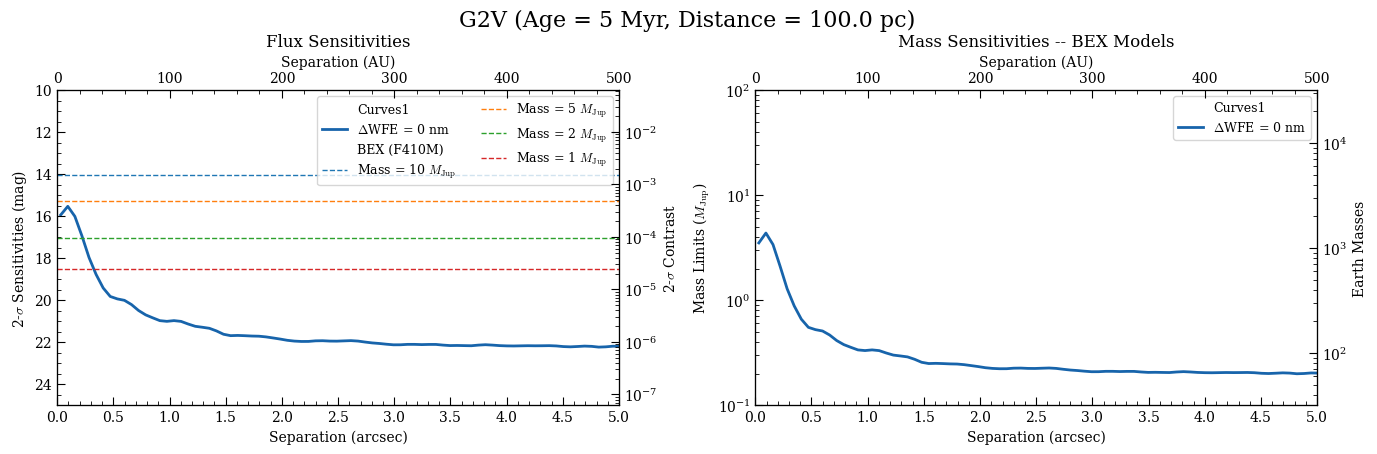

In [53]:
age = 5

k1 = filt_keys[0]
do_plot_contrasts2(k1, None, cont_dict, 2.5, obs_dict, wfe_dict, age, 
                   xr=[0,5], yr=[25,10], av_vals=None)

In [26]:
rr

array([0.01555, 0.04665, 0.07775, 0.10885, 0.13995, 0.17105, 0.20215,
       0.23325, 0.26435, 0.29545, 0.32655, 0.35765, 0.38875, 0.41985,
       0.45095, 0.48205, 0.51315, 0.54425, 0.57535, 0.60645, 0.63755,
       0.66865, 0.69975, 0.73085, 0.76195, 0.79305, 0.82415, 0.85525,
       0.88635, 0.91745, 0.94855, 0.97965, 1.01075, 1.04185, 1.07295,
       1.10405, 1.13515, 1.16625, 1.19735, 1.22845, 1.25955, 1.29065,
       1.32175, 1.35285, 1.38395, 1.41505, 1.44615, 1.47725, 1.50835,
       1.53945, 1.57055, 1.60165, 1.63275, 1.66385, 1.69495, 1.72605,
       1.75715, 1.78825, 1.81935, 1.85045, 1.88155, 1.91265, 1.94375,
       1.97485, 2.00595, 2.03705, 2.06815, 2.09925, 2.13035, 2.16145,
       2.19255, 2.22365, 2.25475, 2.28585, 2.31695, 2.34805, 2.37915,
       2.41025, 2.44135, 2.47245, 2.50355, 2.53465, 2.56575, 2.59685,
       2.62795, 2.65905, 2.69015])